In [46]:
import matplotlib.pyplot as plt

import dask.array as da

In [5]:
x = da.random.random(size=(1_000, 1_000), chunks=(250, 500))
x

dask.array<random_sample, shape=(1000, 1000), dtype=float64, chunksize=(250, 500), chunktype=numpy.ndarray>

In [6]:
result = (x + x.T).sum(axis=0).mean()

In [7]:
result

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

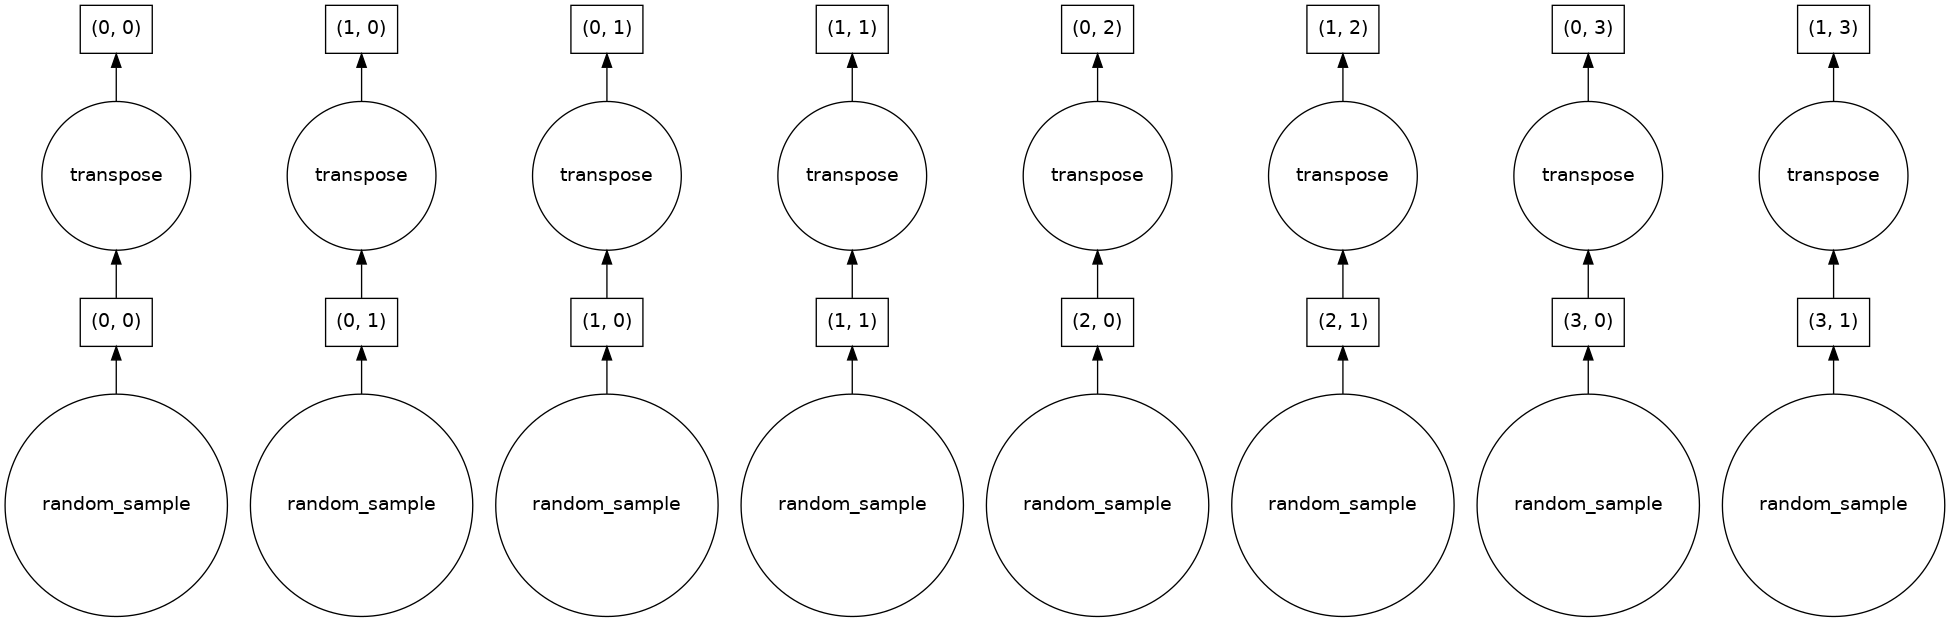

In [9]:
x.T.visualize()

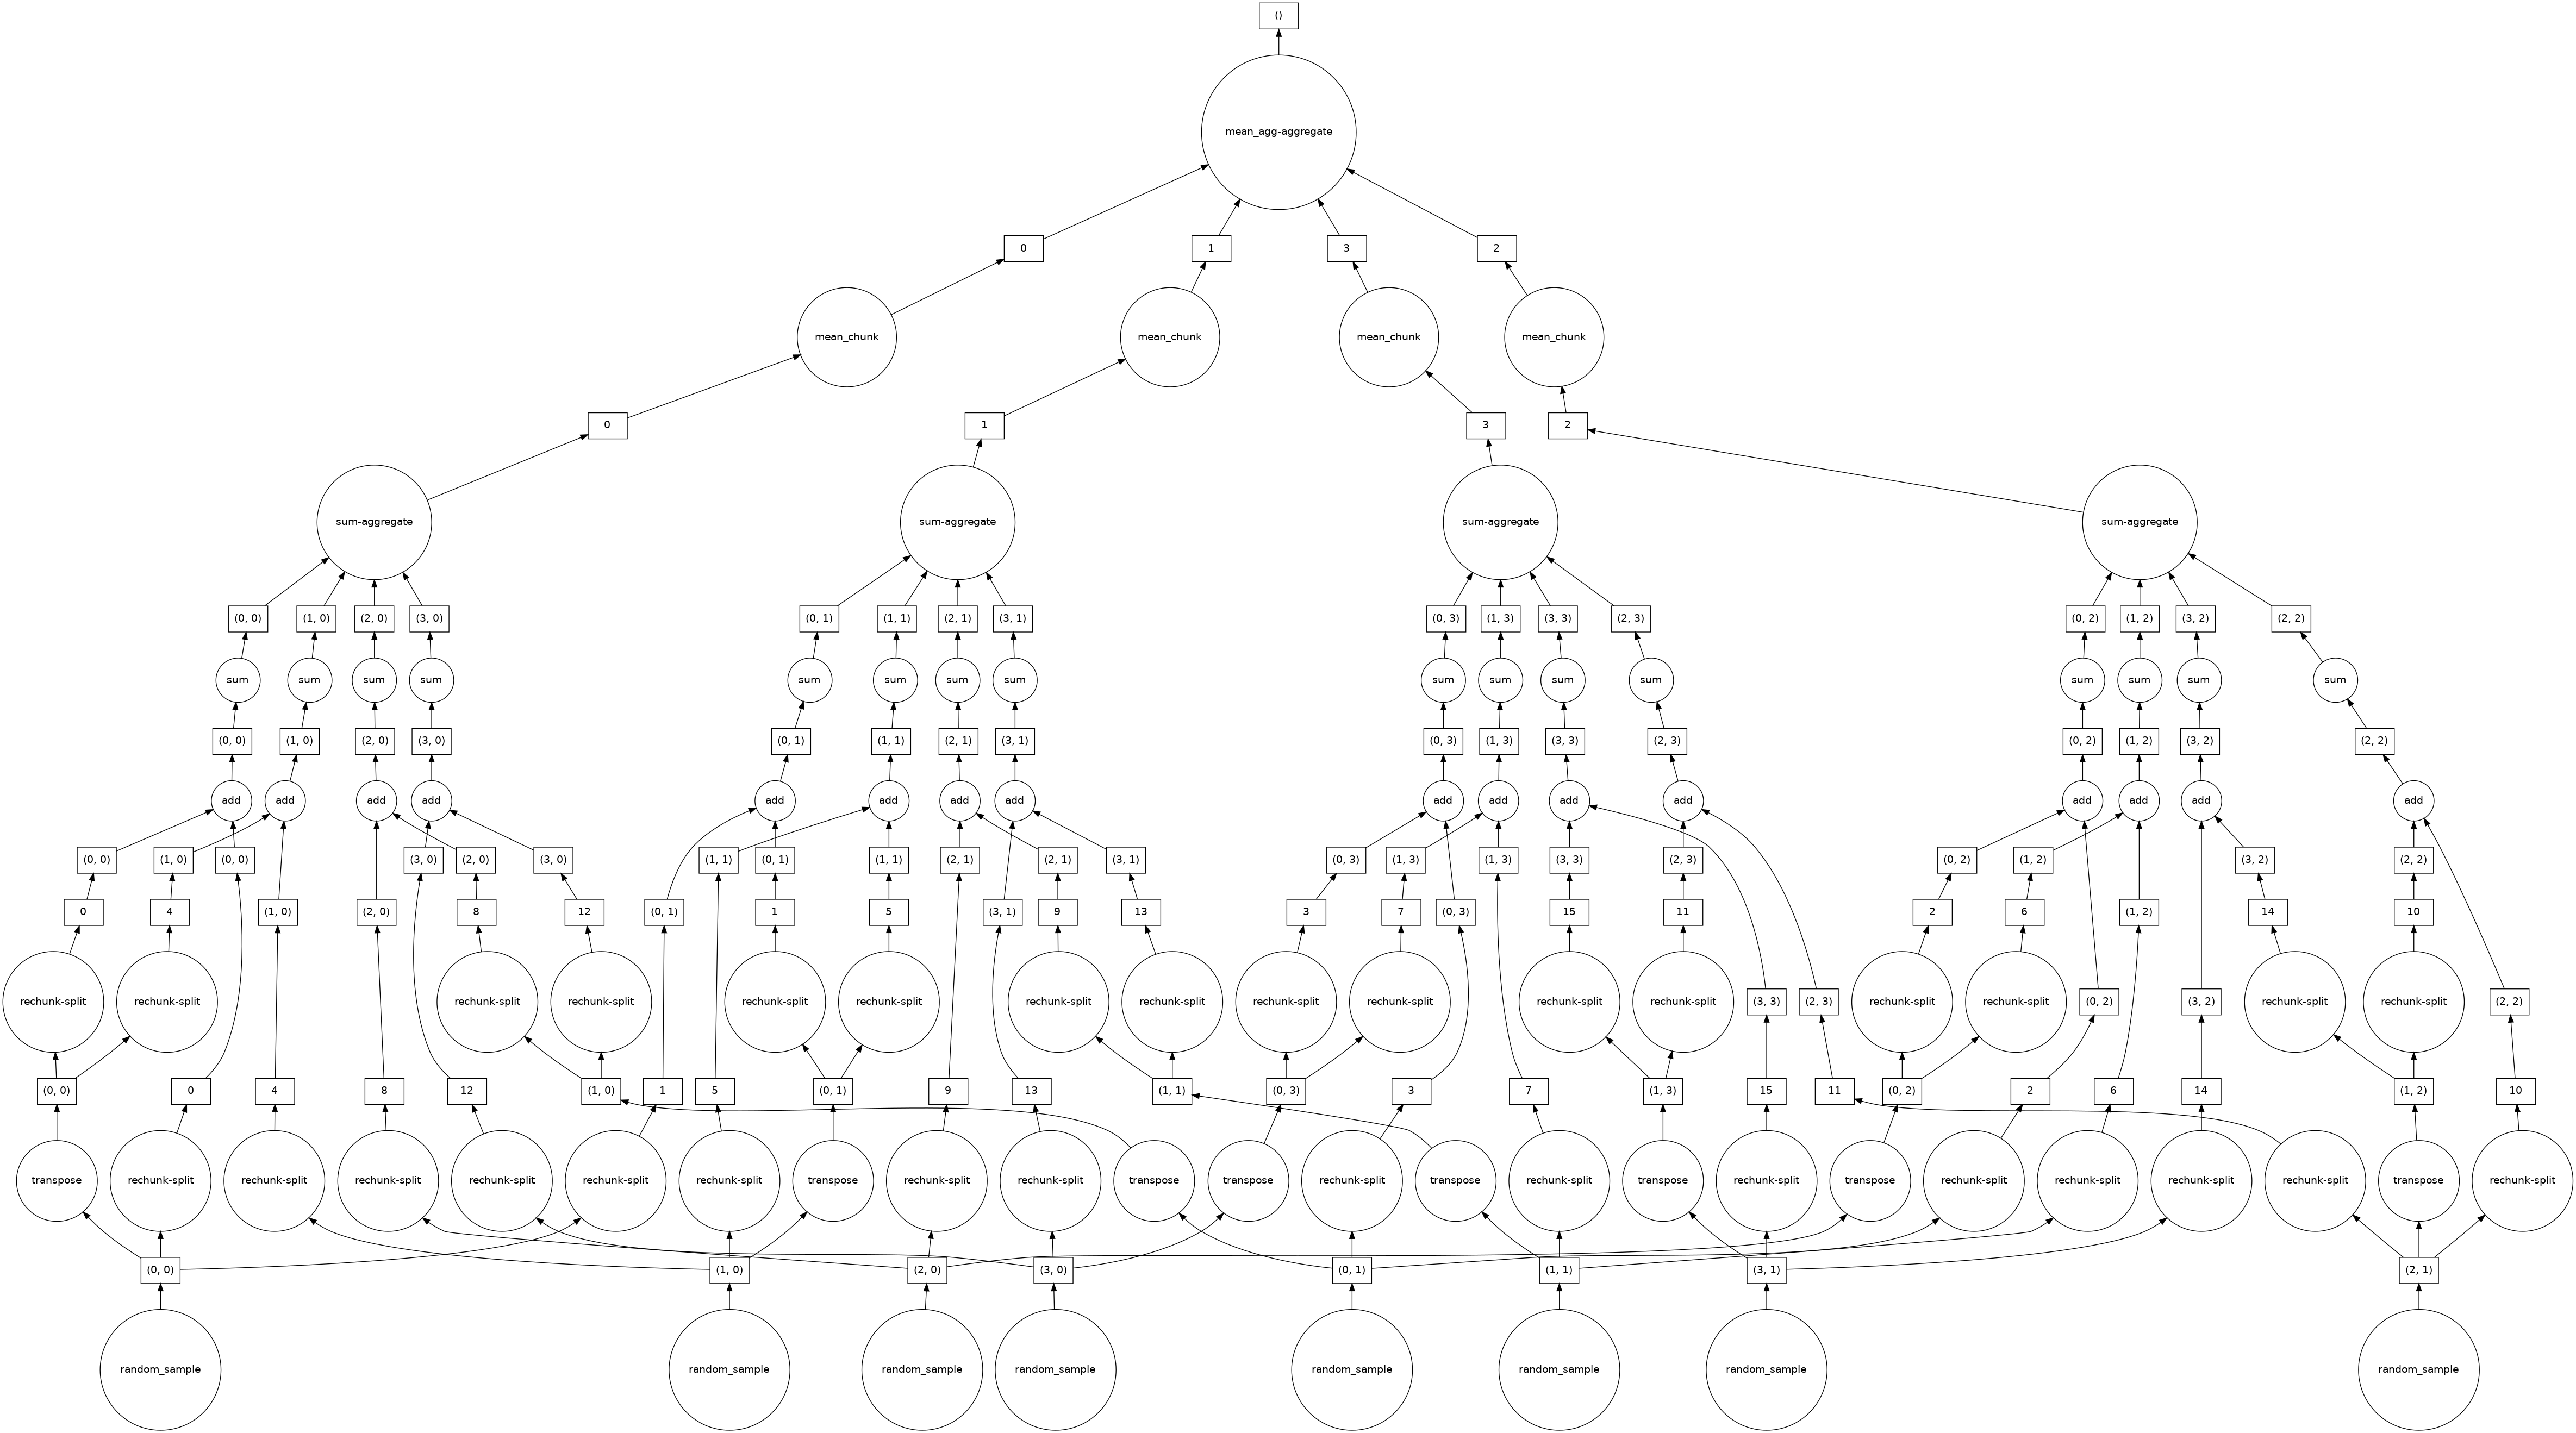

In [10]:
result.visualize()

In [11]:
import numpy as np

In [12]:
def random_sample():
    return np.random.random(size=(250, 500))

In [13]:
x

dask.array<random_sample, shape=(1000, 1000), dtype=float64, chunksize=(250, 500), chunktype=numpy.ndarray>

In [14]:
y = da.map_blocks(random_sample, chunks=((250, 250, 250, 250), (500, 500)), dtype=np.float32)
y

dask.array<random_sample, shape=(1000, 1000), dtype=float32, chunksize=(250, 500), chunktype=numpy.ndarray>

In [15]:
a = da.arange(1000, chunks=(100,))
b = da.arange(100, chunks=(10,))
a

dask.array<arange, shape=(1000,), dtype=int64, chunksize=(100,), chunktype=numpy.ndarray>

In [16]:
b

dask.array<arange, shape=(100,), dtype=int64, chunksize=(10,), chunktype=numpy.ndarray>

In [17]:
def func(a, b):
    return np.array([a.max(), b.max()])

In [18]:
result = da.map_blocks(func, a, b, chunks=(2,))
result

dask.array<func, shape=(20,), dtype=int64, chunksize=(2,), chunktype=numpy.ndarray>

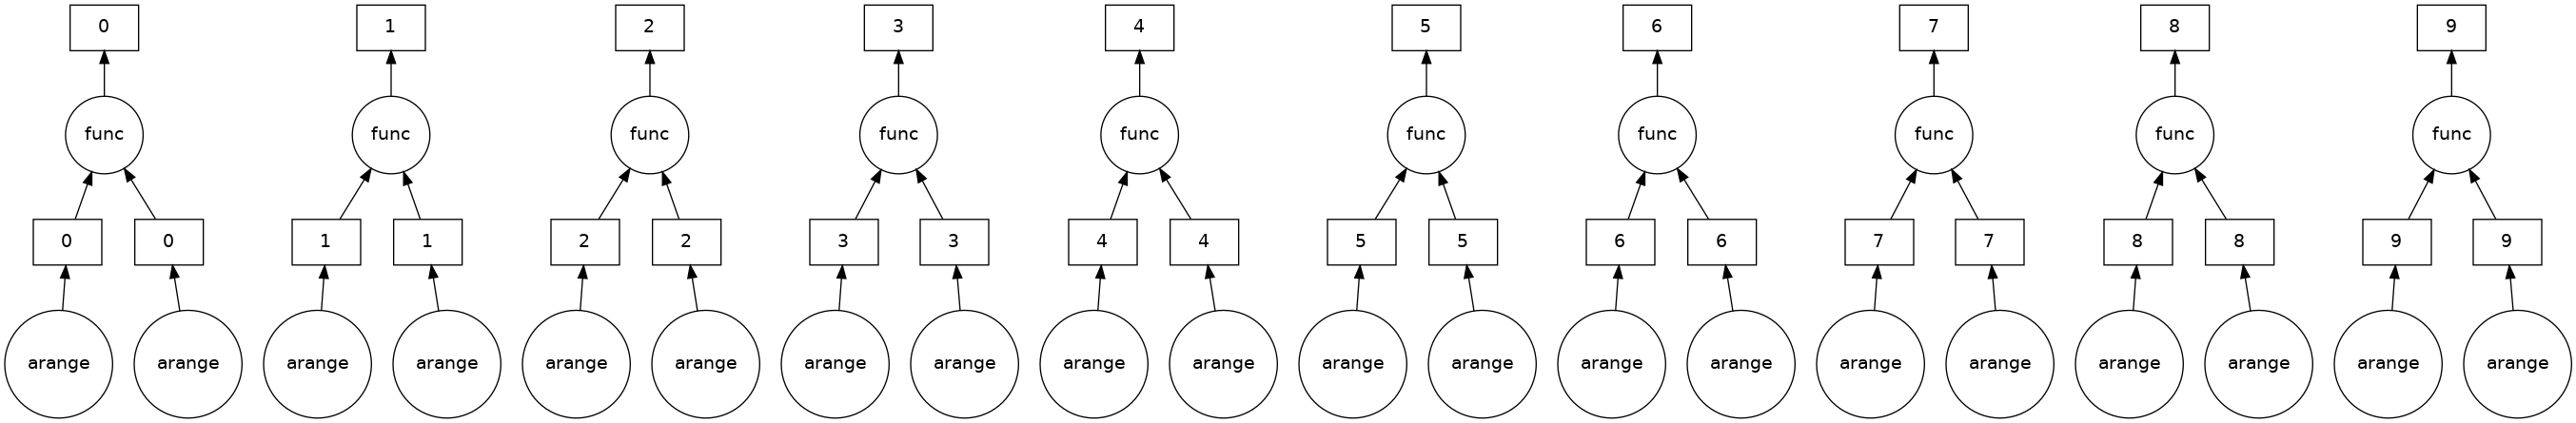

In [19]:
result.visualize()

In [20]:
from pprint import pprint

In [21]:
def func(a, b, block_id=None, block_info=None):
    if block_id == (0,):
        pprint(block_info)

    return np.array([a.max(), b.max()])

In [23]:
da.map_blocks(func, a, b, chunks=(2,)).compute()

{None: {'array-location': [(0, 2)],
        'chunk-location': (0,),
        'chunk-shape': (2,),
        'dtype': dtype('int64'),
        'num-chunks': (10,),
        'shape': (20,)},
 0: {'array-location': [(0, 100)],
     'chunk-location': (0,),
     'num-chunks': (10,),
     'shape': (1000,)},
 1: {'array-location': [(0, 10)],
     'chunk-location': (0,),
     'num-chunks': (10,),
     'shape': (100,)}}


array([ 99,   9, 199,  19, 299,  29, 399,  39, 499,  49, 599,  59, 699,
        69, 799,  79, 899,  89, 999,  99])

In [24]:
import dask
import dask.dataframe as dd

In [26]:
ddf = dask.datasets.timeseries()
ddf.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,932,Hannah,-0.613609,0.388053
2000-01-01 00:00:01,1014,Victor,0.265819,0.307402
2000-01-01 00:00:02,1060,Dan,0.089148,0.973401
2000-01-01 00:00:03,985,Alice,-0.112199,-0.793110
2000-01-01 00:00:04,997,Dan,0.091290,-0.736500


In [27]:
result = ddf.map_partitions(lambda df, threshold: (df.x + df.y) > 0, threshold=0)
result

Dask Series Structure:
npartitions=30
2000-01-01    bool
2000-01-02     ...
              ... 
2000-01-30     ...
2000-01-31     ...
dtype: bool
Dask Name: lambda, 60 tasks

In [28]:
result.compute()

timestamp
2000-01-01 00:00:00    False
2000-01-01 00:00:01     True
2000-01-01 00:00:02     True
2000-01-01 00:00:03    False
2000-01-01 00:00:04    False
                       ...  
2000-01-30 23:59:55     True
2000-01-30 23:59:56    False
2000-01-30 23:59:57     True
2000-01-30 23:59:58    False
2000-01-30 23:59:59    False
Freq: S, Length: 2592000, dtype: bool

In [29]:
ddf._meta

,id,name,x,y
timestamp,,,,


In [33]:
ddf.sum()

Dask Series Structure:
npartitions=1
id    object
y        ...
dtype: object
Dask Name: dataframe-sum-agg, 61 tasks

In [36]:
result._meta

Series([], Freq: H, dtype: bool)

In [42]:
result = ddf.map_partitions(lambda df, threshold: (df.x + df.y) > threshold, threshold=0, meta=str)

In [43]:
result._meta

Series([], dtype: object)

In [44]:
result.compute()

timestamp
2000-01-01 00:00:00    False
2000-01-01 00:00:01     True
2000-01-01 00:00:02     True
2000-01-01 00:00:03    False
2000-01-01 00:00:04    False
                       ...  
2000-01-30 23:59:55     True
2000-01-30 23:59:56    False
2000-01-30 23:59:57     True
2000-01-30 23:59:58    False
2000-01-30 23:59:59    False
Freq: S, Length: 2592000, dtype: bool

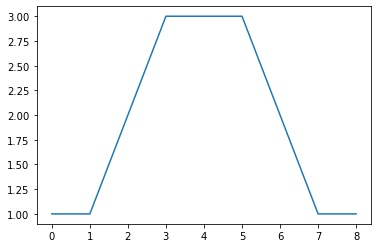

In [48]:
a = np.array([1, 1, 2, 3, 3, 3, 2, 1, 1])
a = da.from_array(a, chunks=5)
plt.plot(a);

In [49]:
def derivative(a):
    return a - np.roll(a, 1)

In [50]:
b = a.map_overlap(derivative, depth=1, boundary=None)
b

dask.array<_trim, shape=(9,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

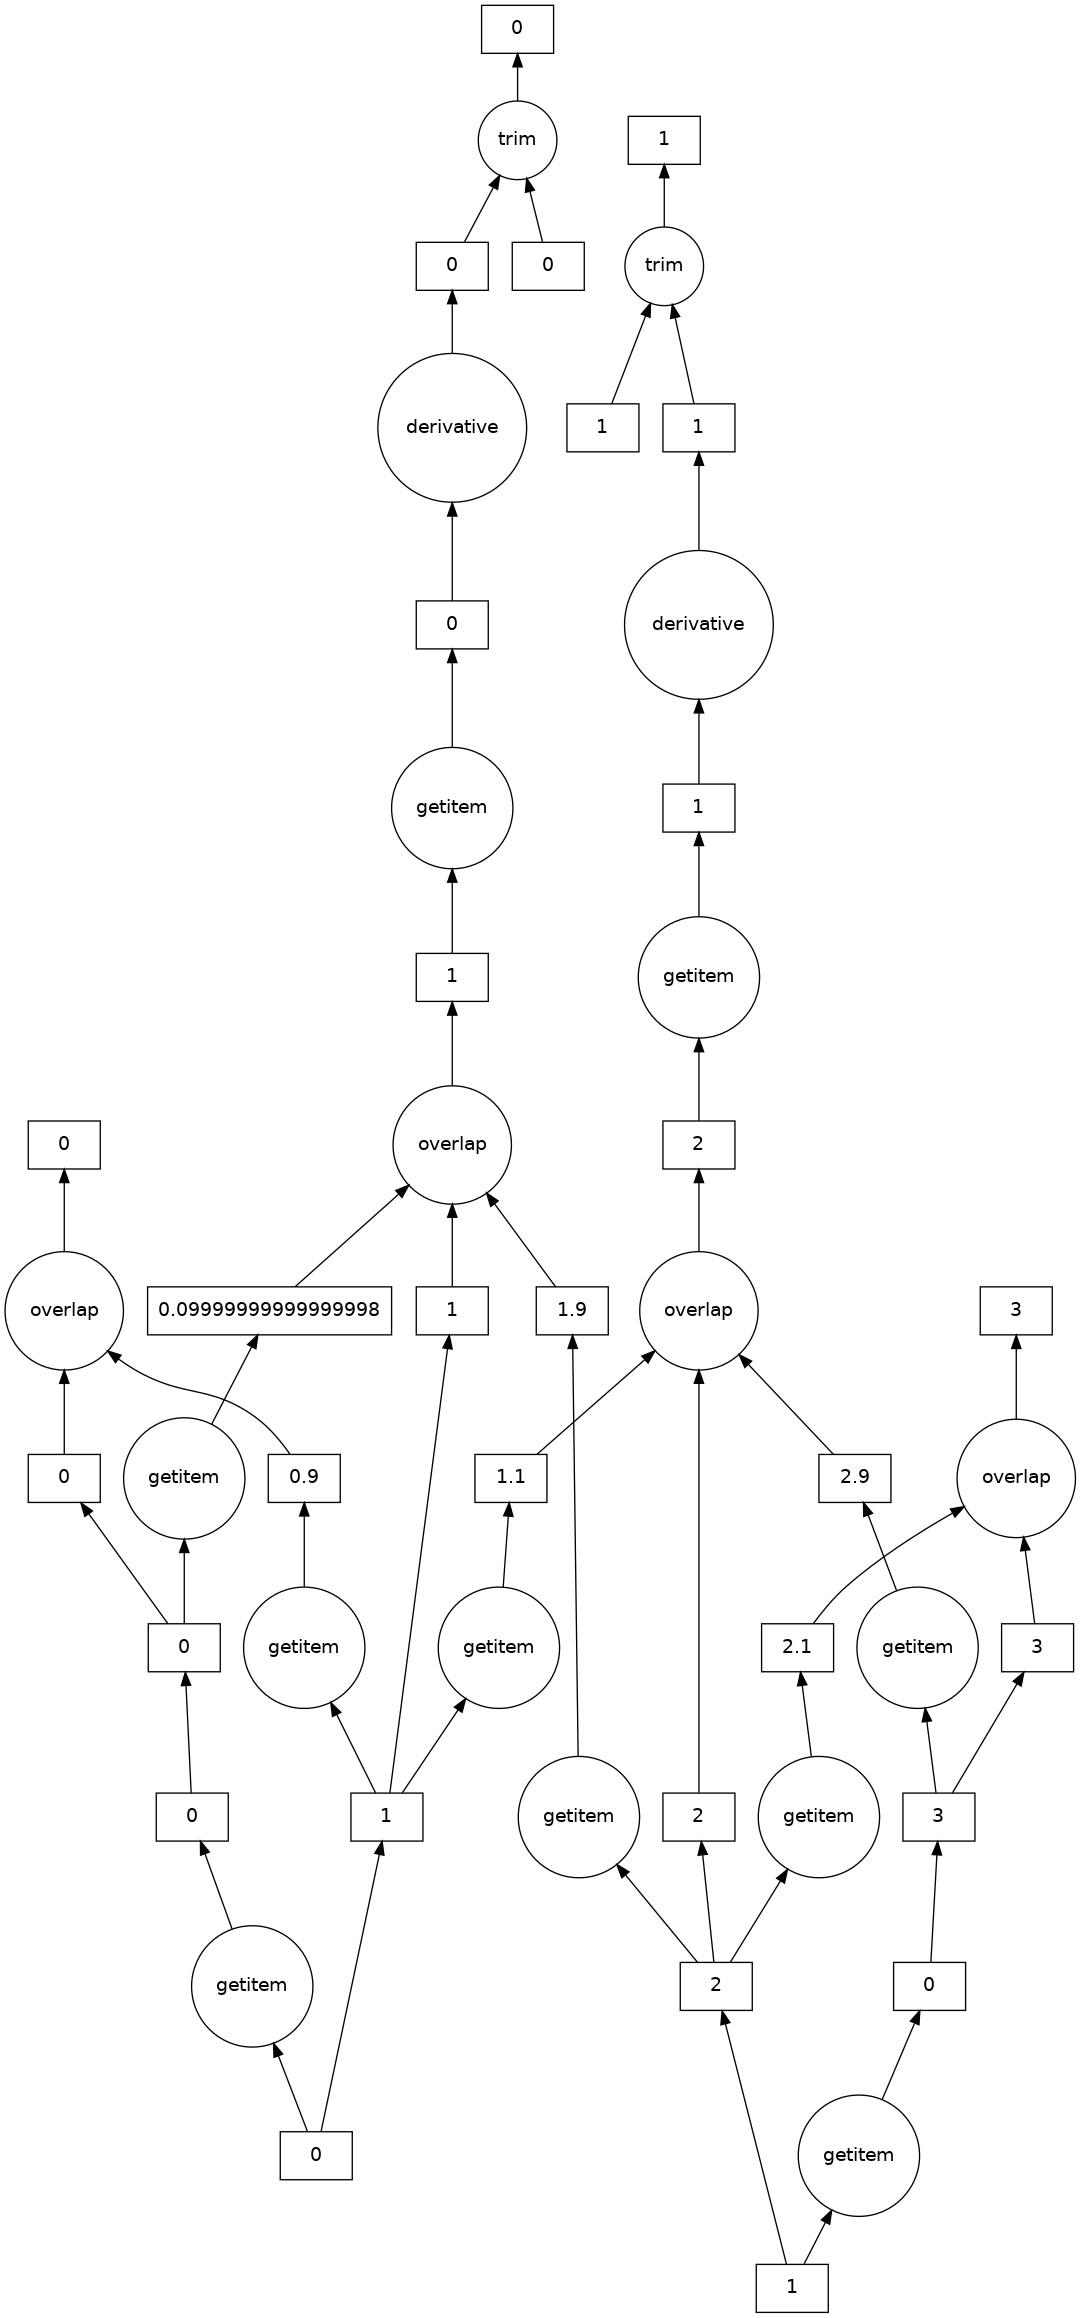

In [51]:
b.visualize()

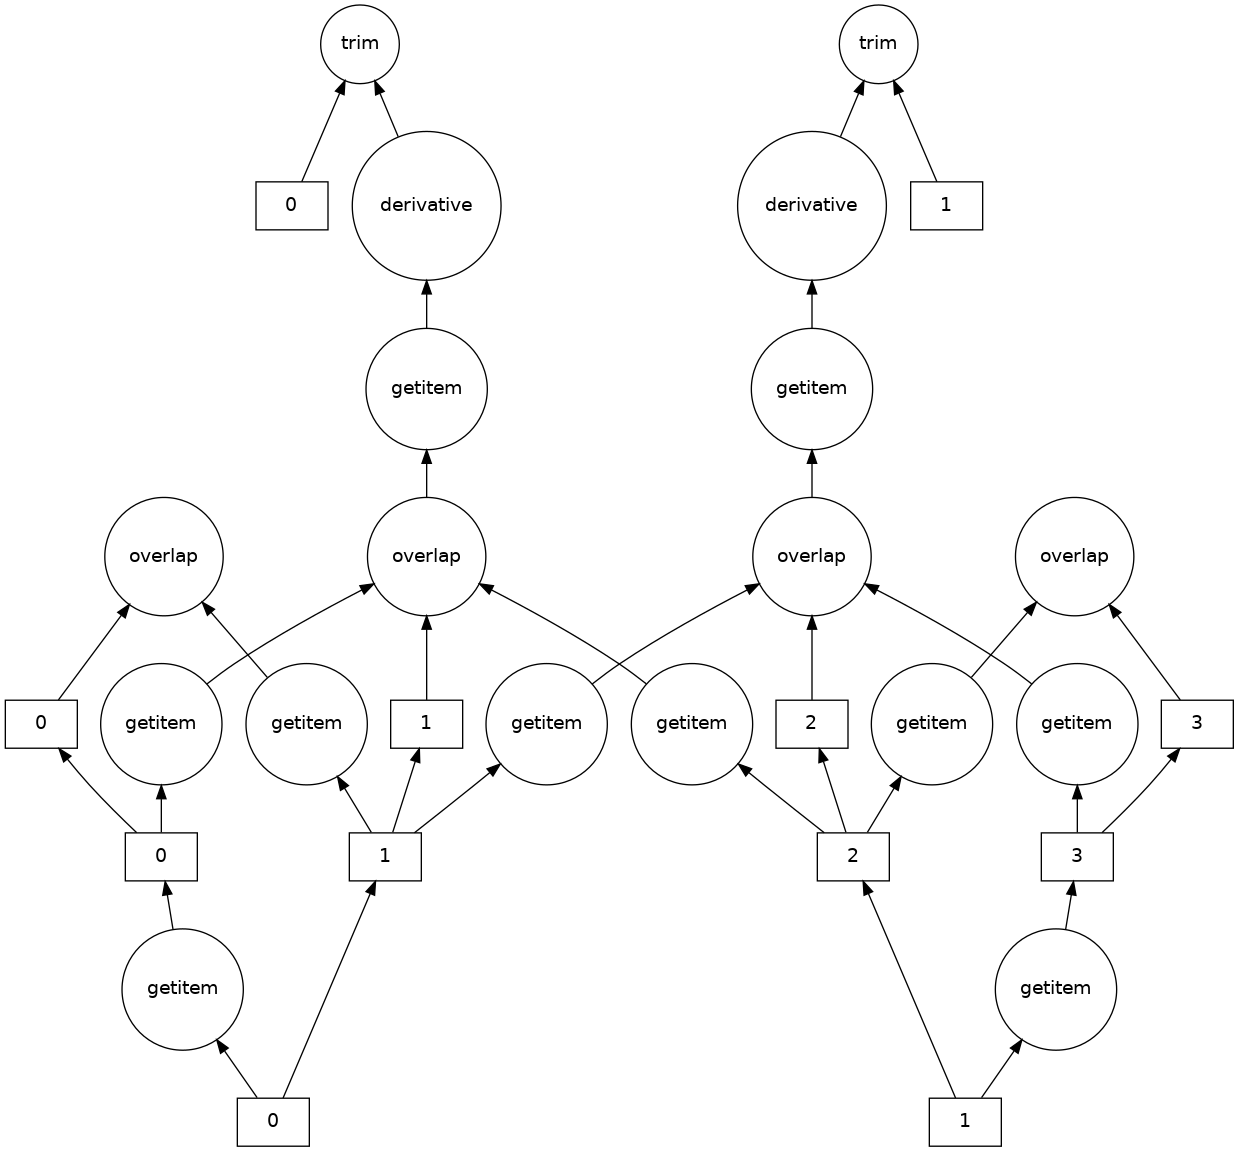

In [52]:
b.visualize(collapse_outputs=True)